In [5]:
# Example usage
base_path = '/Users/lvrinn/Documents/Kecerdasan Buatan/Code/Proyek/'
annotations_dir = base_path + 'annotations/'
images_dir = base_path + 'images/'

# Visualisasi Data 1

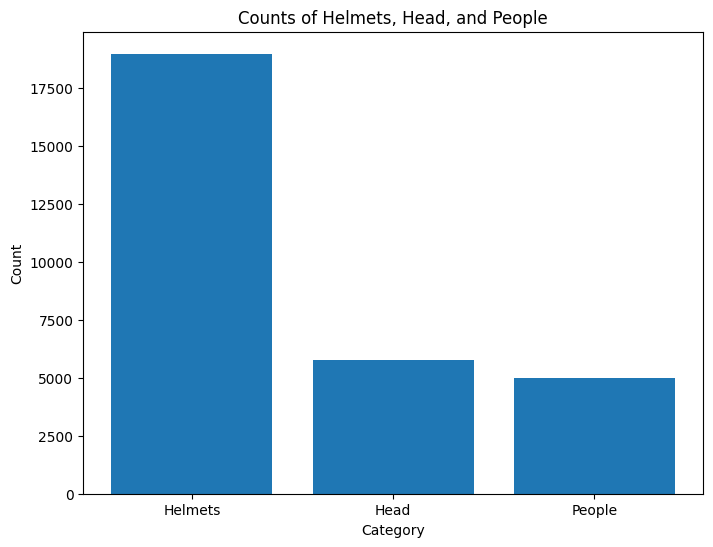

In [2]:
import os
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

# Count the number of helmets, non-helmets, and people
helmet_count = 0
head = 0
person_count = 0

for filename in os.listdir(annotations_dir):
    if filename.endswith('.xml'):
        annotations_path = os.path.join(annotations_dir, filename)
        tree = ET.parse(annotations_path)
        root = tree.getroot()

        image_filename = root.find('filename').text
        image_path = os.path.join(images_dir, image_filename)
        image = cv2.imread(image_path)

        # Count the number of people in the image
        person_count += 1

        for object in root.findall('object'):
            name = object.find('name').text
            if name == 'helmet':
                helmet_count += 1
            elif name == 'head':
                head += 1

# Visualize the counts
labels = ['Helmets', 'Head', 'People']
counts = [helmet_count, head, person_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Helmets, Head, and People')
plt.show()

# Explanation and Conclusion:
# This visualization shows the counts of helmets, non-helmets, and people present in the raw dataset.
# By analyzing this visualization, you can gain insights into the distribution of different categories in the data.
# If there is a significant imbalance between the categories (e.g., many more helmets than non-helmets), it may indicate potential biases or issues in the data collection process.
# This information can help you make informed decisions about potential data augmentation techniques or sampling strategies to balance the dataset during preprocessing or model training.